In [125]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

from warnings import filterwarnings
filterwarnings('ignore')


from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from scipy.stats import uniform, randint



In [202]:
df = pd.read_csv('C:\\Users\\Ufuk Altan\\Downloads\\Downloads\\Data Science\\I Dati\\Prosperity.csv')
df.head()

,Country,GDP Per Capita,Technology,Human Capital,Institutional Framework,Sustainable Resources,Demand Environment,Education,Happiness,Unemployment Rate,Population,Import Degree,Import Eigenvector,Import Betweenness,Export Degree,Export Eigenvector,Export Betweenness,Location
0,Albania,5260.9,3.40,4.62,4.70,6.19,3.16,1153,4.719,0.120,2880248,0,0.000000,0.000000,0,0.000000,0.000000,Europe
1,Algeria,4449.8,2.97,3.58,3.60,5.36,5.00,1086,5.211,0.117,43216262,3,0.022113,0.000000,3,0.029143,0.000000,Africa
2,Argentina,10667.1,3.78,4.94,4.16,5.84,4.99,1187,6.086,0.101,44866075,6,0.043574,0.000000,4,0.038238,0.000000,South America
3,Armenia,4190.2,3.53,5.07,4.93,5.85,3.68,1345,4.559,0.169,2958996,0,0.000000,0.000000,0,0.000000,0.000000,Middle East
4,Australia,56698.1,6.91,7.41,8.32,6.47,5.78,1556,7.228,0.052,25265536,20,0.098483,0.003389,21,0.129649,0.003652,Oceania


In [171]:
def plot_quantiles(data, cat_column, num_column):
    
    """
    PLots 1st and 3rd quantiles.
    """
    
    from warnings import filterwarnings
    filterwarnings("ignore")
    
    order = np.array(data.groupby(cat_column)[num_column].quantile(0.75).index)
        
    
    plt.figure(figsize=(20,20))
    
    plt.subplot(4,1,1)
    data.groupby(cat_column)[num_column].quantile(0.75).plot()
    plt.xlabel("Quantile 3")
    
    
    plt.subplot(4,1,2)
    data.groupby(cat_column)[num_column].quantile(0.25).plot()
    plt.xlabel("Quantile 1")
    
    plt.subplot(4,1,3)
    data.groupby(cat_column)[num_column].median().plot(color = 'g')
    plt.xlabel("Median")
    
    plt.subplot(4,1,4)
    sns.boxplot(data = data, x = cat_column, y=num_column, order = order) 
    
def percentage_error(dataframe,pred, true_value):
    
    '''
    dataframe: Pass in pandas dataframe variable
    pred = 'Predictions' #model.predict(x_test).reshape()
    true_value = 'True Values' #y_test
    
    '''
    
    difference = dataframe[true_value] - dataframe[pred]
    
    dataframe['Error(%)']= np.absolute(difference/dataframe[true_value]*100)
    
    print('median \t {}'.format(dataframe['Error(%)'].median()))    
    print(dataframe['Error(%)'].describe())
    
def adjusted_r_squared(r2, data):
    
    x = (1-r2)*(data.shape[0]-1)/(data.shape[0]-data.shape[1]-1) 
    
    return 1-x

In [203]:
log_GPC = np.log(df['GDP Per Capita'])
df['Log_GPC'] = log_GPC

In [204]:
cols = ['Technology', 'Human Capital',
       'Institutional Framework', 'Sustainable Resources',
       'Demand Environment', 'Education', 'Happiness', 'Unemployment Rate',
       'Population', 
       'Export Eigenvector',
       'Location',
        'Log_GPC']

df = df[cols]

<AxesSubplot:>

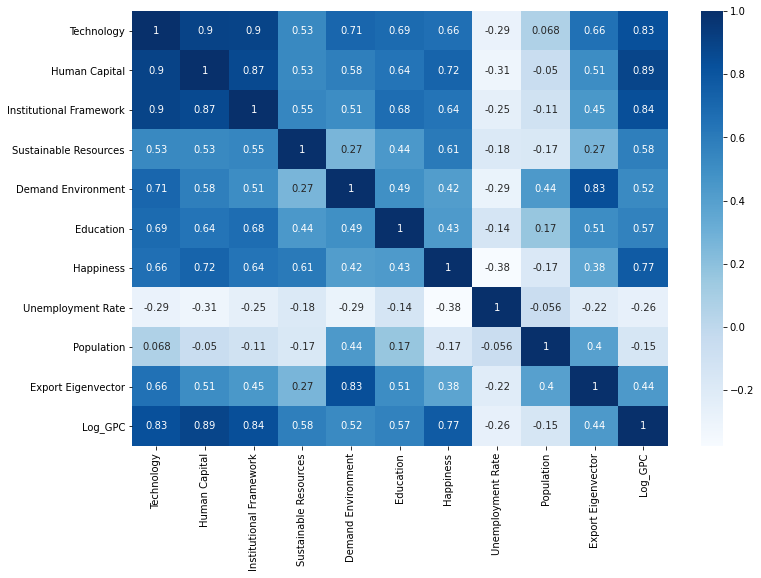

In [205]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot=True, cmap = 'Blues')

In [206]:
X = df.drop('Log_GPC', axis =1)
y = df['Log_GPC']

In [207]:
X = pd.get_dummies(X)
X.drop('Location_Europe', inplace = True, axis =1)

In [208]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.15 ) 

In [209]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [218]:
xgbRegressor = xgb.XGBRegressor(objective="reg:linear", random_state=0) #"reg:squarederror"
xgbRegressor.fit(X_train, y_train)

[15:57:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[15:57:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [219]:
y_pred = xgbRegressor.predict(X_test)

In [220]:
test = pd.DataFrame()
test['TrueValues'] = y_test
test['Predictions'] = y_pred

In [222]:
percentage_error(test,'Predictions', 'TrueValues')

median 	 2.247954212320576
count    15.000000
mean      3.619279
std       3.141102
min       0.424741
25%       1.557627
50%       2.247954
75%       4.969866
max       9.871637
Name: Error(%), dtype: float64


In [223]:
from sklearn.metrics import mean_absolute_error, r2_score, median_absolute_error, explained_variance_score, mean_squared_error
mean_absolute_error(y_test, y_pred), median_absolute_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))

(0.3104205170517621, 0.22292043425803065, 0.3808670926679406)

In [224]:
r2_score(y_test, y_pred), adjusted_r_squared(r2_score(y_test, y_pred), df),explained_variance_score(y_test, y_pred)

(0.9002545636461403, 0.8864965724249183, 0.9116246793483307)

<AxesSubplot:xlabel='Error(%)'>

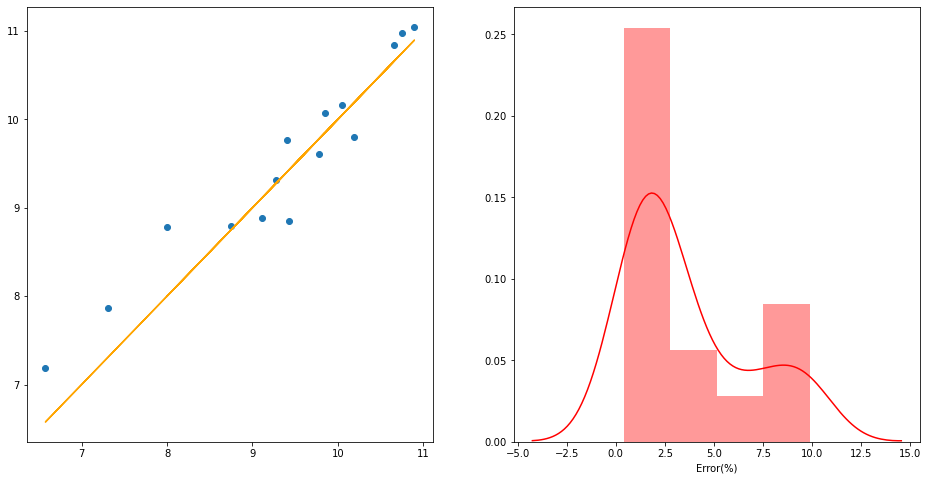

In [225]:
plt.figure(figsize = (16,8))

plt.subplot(1,2,1)
plt.scatter(test['TrueValues'], test['Predictions'])
plt.plot(test['TrueValues'], test['TrueValues'], c='orange')

plt.subplot(1,2,2)
sns.distplot(test['Error(%)'], color = 'r')

<AxesSubplot:xlabel='Error(%)'>

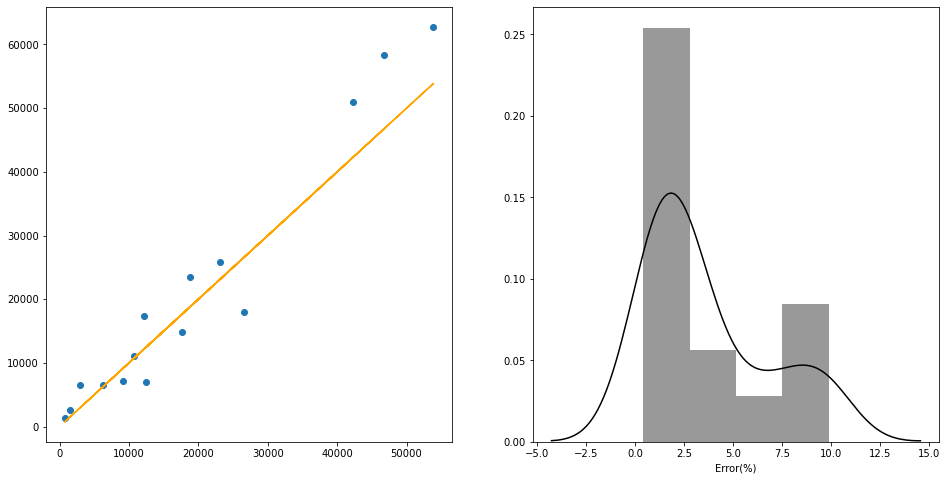

In [226]:
plt.figure(figsize = (16,8))

plt.subplot(1,2,1)
plt.scatter(np.exp(test['TrueValues']), np.exp(test['Predictions']))
plt.plot(np.exp(test['TrueValues']), np.exp(test['TrueValues']), c='orange')

plt.subplot(1,2,2)
sns.distplot(test['Error(%)'], color = 'black')